# whole brain ABSOLUTE CNR observations

plot the absolute CNR observed for each protocol across the whole brain, for cross referencing with the whole brain CNR plots

In [1]:
import matplotlib.pyplot as plt
import nilearn.plotting as niplt # for debugging
import nilearn.image as img
import pandas as pd
import nibabel as nib
import os

In [2]:
# define subject paths and variables for the session
Basedir =  "/scratch/qbi/uqkgarn1/"
#t = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/figures/tmaps/sub-%s/TR%s/abs_spmT_00%s.nii.gz'
t = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-%s/TR%s/FLGLM/abs_spmT_00%s.nii.gz'
T1 = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-%s/anat/sub-%s_desc-masked_T1w.nii.gz'
maskpath = ''.join('/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-{0}/TR{1}/MASKS/r{2}_trans.nii.gz')
masks = ['CN', 'GPi', 'STN', 'GPe', 'Put', 'VS']
mv = 10 # maximum value when plotting
subs = ['02', '05'] # subject numbers to be plotted
sub_coords = [[28,22,-20],[-14, 43, 7]] # coordinates to slice image [change to match Forstmann]
figsz = [12, 12] # fig size in inches
nrow = 3 # for subplots
ncol = 1

In [3]:
# test that settings get you to the right place
t % ('02', '700', '01')

'/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-02/TR700/FLGLM/abs_spmT_0001.nii.gz'

# contrasts of interest to plot

- [ ] left hand > right hand: 15
- [ ] left target - right target: 5

In [4]:
def plotT(t, T1, maskpath, masks, sub, TR, contrast, coords, maxval, axes=None):
    stats = t % (sub, TR, contrast)
    stats = img.smooth_img(stats, 4)
    T1 = T1 % (sub, sub)
    ms = [maskpath.format(subnum, TRnum, mask_name) for subnum in [sub] for TRnum in [TR] for mask_name in masks] 
    disp = niplt.plot_stat_map(stat_map_img=stats, 
                               bg_img=T1, 
                               cut_coords=coords, 
                               colorbar=True, 
                               axes=axes,
                               annotate=True,
                               symmetric_cbar=True,
                               draw_cross=False,
                               title= 'sub %s, TR %s' % (sub, TR),
                               black_bg=True,
                               vmax = maxval) 
    disp.add_contours(ms[0])    
    disp.add_contours(ms[1]) 
    disp.add_contours(ms[2]) 
    disp.add_contours(ms[3]) 
    disp.add_contours(ms[4]) 
    disp.add_contours(ms[5])  
    return disp

**Sanity check plots for sub 02**

**Motoric contrast (left hand - right hand response)**

Here I plot the left - right hand contrast for each TR for sub 02. I start with the sequence that had least distortion and strongest t-values - i.e. the *single-echo multiband sequence*

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


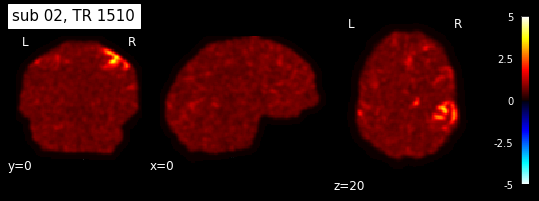

In [5]:
plotT(t, T1, maskpath, masks, '02', '1510', '15', [0, 0, 20], 5)

Here I plot the same subject for the *3D EPI sequence*:

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


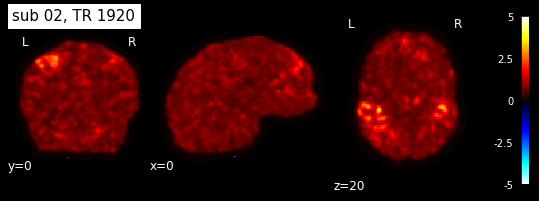

In [6]:
plotT(t, T1, maskpath, masks, '02', '1920', '15', [0, 0, 20], 5)

And for the *multi-echo, multiband* sequence

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


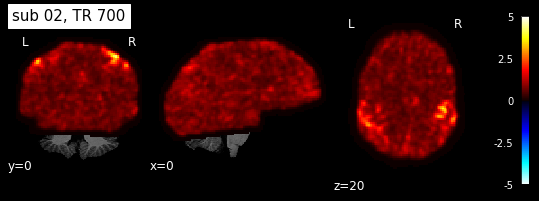

In [7]:
plotT(t, T1, maskpath, masks, '02', '700', '15', [0, 0, 20], 5)

Now I plot each image of the multi-echo, multiband sequence, starting with *TE=10 ms* 

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


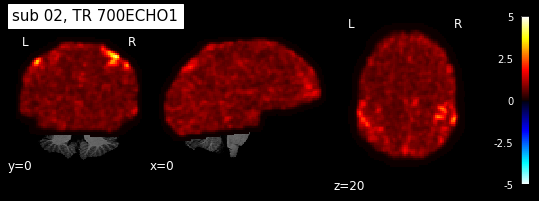

In [8]:
plotT(t, T1, ''.join('/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-{0}/TR{1}/MASKS/r{2}_trans.nii.gz'), masks, '02', '700ECHO1', '15', [0, 0, 20], 5)

And now for *TE=30 ms*

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


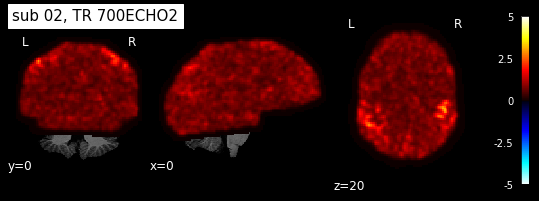

In [9]:
plotT(t, T1, ''.join('/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-{0}/TR{1}/MASKS/r{2}_trans.nii.gz'), masks, '02', '700ECHO2', '15', [0, 0, 20], 5)

**Target field contrast**
Now I plot for the *left target - right target* contrast, starting with the single-echo, multiband sequence

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


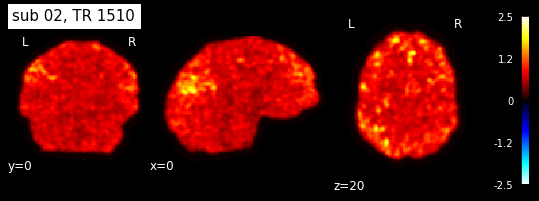

In [10]:
plotT(t, T1, maskpath, masks, '02', '1510', '05', [0, 0, 20], 2.5)

And for the 3D EPI:

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


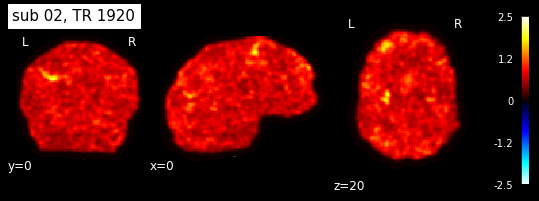

In [11]:
plotT(t, T1, maskpath, masks, '02', '1920', '05', [0, 0, 20], 2.5)

For the multi-echo, multiband...

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


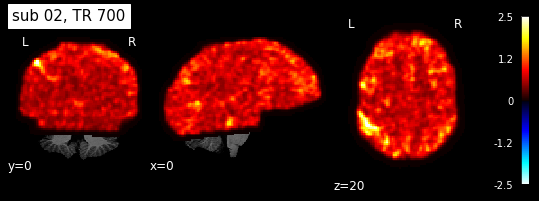

In [12]:
plotT(t, T1, maskpath, masks, '02', '700', '05', [0, 0, 20], 2.5)

For TE=10 ms:

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


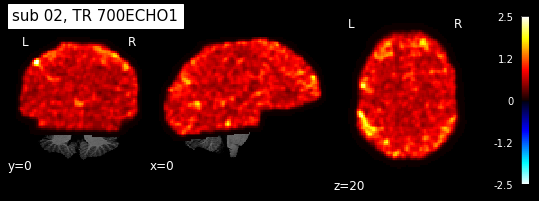

In [13]:
plotT(t, T1, ''.join('/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-{0}/TR{1}/MASKS/r{2}_trans.nii.gz'), masks, '02', '700ECHO1', '05', [0, 0, 20], 2.5)

And for TE=30 ms:

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


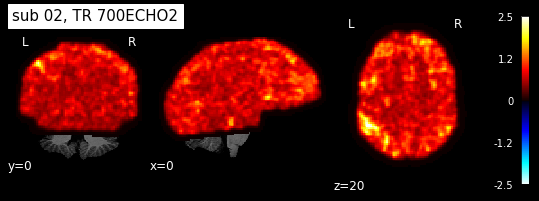

In [14]:
plotT(t, T1, ''.join('/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST/sub-{0}/TR{1}/MASKS/r{2}_trans.nii.gz'), masks, '02', '700ECHO2', '05', [0, 0, 20], 2.5)

...and just to look at the two images driving the difference for the single-echo, multiband sequence:

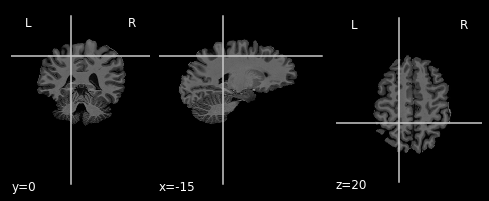

In [45]:
# for navigation:
niplt.plot_anat(T1 % ('02', '02'), cut_coords=[-15,0,20])